# 8장. 비지도 학습 - 차원 축소

---

## 학습 목표
- PCA의 의미를 이해합니다.
- PCA를 사용하여 차원 축소를 시행해봅니다.
- PCA를 응용하여 Eigen Face 예제를 수행해봅니다.

---

## 목차

### 1. 차원 축소
1. 차원의 저주
2. PCA 의미 이해하기
3. Principal Component Analysis (PCA)
4. PCA를 활용한 얼굴 분류 (Eigen Face)


---

## 1. 차원 축소

### 1-1. 차원의 저주

차원의 저주(The Curse of Dimensionality)는 고차원 공간 상에서 데이터를 분석하거나 측정할 때, 저차원 공간에서는 나타나지 않았던 여러 문제들이 발생하는 것을 의미합니다.

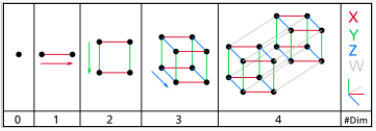

실제로 우리가 그림을 그려볼 수 있는 차원은 3차원에 불과합니다. 3차원 이상인 경우가 되면 눈으로 값을 확인하기가 어려워질 뿐만 아니라 연산량, 데이터 샘플 개수 증가 및 데이터가 희박해지는 문제, 데이터 핸들링 측면에서도 많은 어려움이 생깁니다. 이것을 차원의 저주라 합니다.

이번 시간에는 13차원을 가지는 Wine data를 통하여 PCA 기법을 통해 간략하게나마 차원을 축소시켜보는 실습을 하겠습니다.

### 실습

1. DataFrame 형식의 자료형에 `.head()`를 입력하여 X 및 y data의 내용과 형식을 확인해 보세요.

- df_X의 내용과 형식을 확인해 보세요.
- df_y의 내용과 형식을 확인해 보세요.

2. `np.unique()` 함수를 사용하여 df_y 안의 개별 class값이 어떤 것들이 있는지 확인해 보세요.

- `np.unique()`는 배열에서 중복되지 않는 고유한 요소들의 배열을 리턴합니다.

3. PCA를 활용하여 차원축소를 진행합니다.

- `n_components` : 축소할 차원의 수
- `n_components = 3` 으로 지정하고, X data가 무엇인지 확인해서 값을 넣어보세요.

- X data : 

      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols

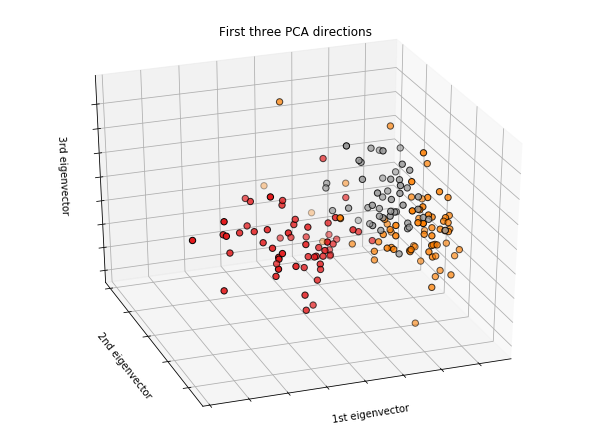

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

def main():
	# wine dataset을 불러옵니다.
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target

    df_X = pd.DataFrame(wine.data, columns = wine.feature_names)
    df_y = pd.DataFrame(y)

    # 1. DataFrame 형식의 자료형에 .head()를 입력하여 X, y data의 생김새를 확인해 보세요.
    # 1-1. df_X의 생김새를 확인해 보세요.
    print("- X data : \n\n", df_X)
    print("\n\n- X data features : \n\n", wine.feature_names)
    # 1-2. df_y의 생김새를 확인해 보세요.
    print("\n\n- y data : \n\n", df_y)

    # 2. np.unique 함수를 사용하여 df_y 안의 개별 class값이 어떤 것들이 있는지 확인해 보세요.
    print("\n\n- y data labels(= class) : \n\n", np.unique(df_y))

    print("\n\n- Dimension : data X의 column 개수는 총 %d 개 입니다. 즉, %d 차원의 벡터 하나가 X data set 중 하나를 의미합니다." 
          %(df_X.shape[1],df_X.shape[1]))    
    
    # 3. PCA를 활용하여 차원축소를 진행합니다.
    # 현재 data X의 컬럼 개수 중에 (n_components)개만 뽑아서 그만큼 차원 축소를 진행합니다.  
    X_reduced = PCA(n_components=3).fit_transform(X)

    print("\n\n- 총 %d 개의 차원(= feature)에서 PCA로 뽑아 낸 3 개의 feature를 출력합니다 : \n\n" %(df_X.shape[1]) , X_reduced[:10])
    print("\n\n- 핵심 feature 3개를 그래프에 그려 시각화합니다.")
    
    plot_PCA_3D_data(X_reduced, y)

# PCA로 뽑아낸 큰 순서대로 3개의 데이터를 시각화합니다.
def plot_PCA_3D_data(X_reduced, y):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)

    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])


if __name__ == "__main__":
    main()


---

### 1-2. PCA 의미 이해하기

PCA는 X data의 차원(= feature)이 많아질수록 많은 차원 중에 이를 대표하는 핵심 feature를 찾는 것을 목표로 합니다.

<img src="8-1-2.gif" width="70%" height="70%" title="8-1-2" alt="8-1-2"></img>

그림과 같이 축을 여러 갈래로 돌리다 보면, 가장 variance가 큰 (각 점들과 축의 오차가 가장 작은) 한 축이 눈에 띄게 되는데요. 이 때의 축을 주성분(principal component) 으로 판단하게 되고, 이렇게 영향력이 높은 축들만을 모아서 차원을 축소할 수 있게 됩니다.

이번 시간에는 wine data의 13개의 feature 중 2개를 선별하여 PCA의 component = 2로 매칭해보겠습니다. 이를 시각화하여 본래 데이터에서 핵심 축이 되는 주성분 벡터를 확인해봅시다.

### 실습

2개의 feature를 2차원 그대로 PCA로 학습시킵니다.

1. PCA를 2개의 핵심 벡터로 변환하기 위해 None을 채워보세요.

2. PCA 함수의 옵션 중 하나인 `whiten`은

- 각 feature들이 상관관계를 최대한 적게 가지게 하고,
- 각 feature들의 variance를 같게 만들어 줍니다.

`whiten = True` or `False`를 입력하여 결과를 비교해 보세요.

3. 학습시킨 모델을 가지고 실제 X data를 넣어서 PCA가 적용 된 X data를 만듭니다.

- features : 

 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


- n_components = 2 만큼의 가장 큰 variance(= eigen value)를 출력합니다: 

 [1.00224986 0.01095745]


- n_components = 2 크기의 PCA vector(= eigen vector) 를 출력합니다: 

 [[ 0.99771189 -0.06760906]
 [ 0.06760906  0.99771189]]


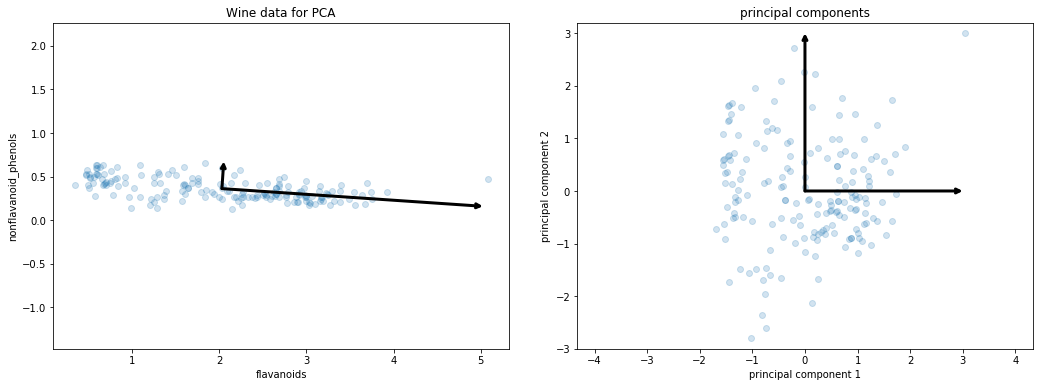

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

def main():
    # wine data를 불러온 뒤, wine의 feature name을 features 변수에 저장합니다.
    wine = load_wine()
    features = wine.feature_names
    print("- features : \n\n", features)

    # 여러 개의 feature 중 2개의 연속적인 feature만 추출합니다.
    column_start = 6
    X = wine.data[:, column_start : column_start + 2]

    # 2개의 feature를 2차원 그대로 PCA로 학습시킵니다.
    
    # 1. PCA를 2개의 핵심 벡터로 변환해보세요.
    
    """ 2. whiten은 
    (i) 각 feature들이 상관관계를 최대한 적게 가지게 하고, 
    (ii) 각 feature들의 variance를 같게 만들어 줍니다. 
    True, False를 입력하여 결과를 비교해 보세요."""
    pca = PCA(n_components=2, whiten=True)
    pca.fit(X)
    
    # data 값이 가장 큰 variance를 가지도록 모델링 했을 때, variance를 출력해 줍니다.
    print("\n\n- n_components = %d 만큼의 가장 큰 variance(= eigen value)를 출력합니다: \n\n" %pca.n_components_, pca.explained_variance_)
    print("\n\n- n_components = %d 크기의 PCA vector(= eigen vector) 를 출력합니다: \n\n"%pca.n_components_, pca.components_)
    
    # 3. 학습시킨 모델을 가지고 실제 X data를 넣어서 PCA가 적용 된 X data를 만듭니다.
    X_pca = pca.transform(X)
    
    plot_max_variance_vectors_and_principal_components(X, pca, X_pca, features, column_start)

# vector를 그려주는 부분입니다.
def plot_vectors(vector_start, vector_end, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=3,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', vector_end, vector_start, arrowprops=arrowprops)


# 그래프를 그려주는 부분입니다.
def plot_max_variance_vectors_and_principal_components(X, pca, X_pca, features, column_start):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.05, right=0.9, wspace=0.15)

    # 원본 데이터에 PCA vector를 그려 출력합니다.
    ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        plot_vectors(pca.mean_, pca.mean_ + v, ax=ax[0])
    ax[0].axis('equal');
    ax[0].set(xlabel=features[column_start], ylabel=features[column_start + 1], title='Wine data for PCA')

    # Principal components 를 출력합니다.
    ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
    plot_vectors([0, 0], [0, 3], ax=ax[1])
    plot_vectors([0, 0], [3, 0], ax=ax[1])
    ax[1].axis('equal')
    ax[1].set(xlabel='principal component 1', ylabel='principal component 2',
                  title='principal components',
                  xlim=(-5, 5), ylim=(-3, 3.2))


if __name__ == '__main__':
    main()

---

### 1-3. Principal Component Analysis (PCA)

PCA를 사용하면 가장 덜 중요한 축들은 제거되고, 가장 높은 variance 값들을 가지는 상위 축만 남겨집니다.

이렇게 데이터 내에서 영향을 덜 주는 feature들이 사라지면, 점들 간에 가장 중요한 관계를 맺는 차원들만을 남길 수 있습니다(Encoding).

예로, feature를 반으로 줄였을 때 대부분의 점들이 잘 보존된다면, 적은 정보로 값을 그대로 표현할 수 있어 데이터를 사용하기에 훨씬 효율적일 것입니다.

이번 실습에서는 2차원으로 고정한 wine data를 주성분이 있는 1차원으로 축소할 때의 결과를 실습해보도록 하겠습니다.

### 실습

1. PCA의 n_components를 1로 지정하세요.

2. PCA 모델을 학습해보세요.

3. X data를 넣어 X_pca 값을 추출합니다.

4. 출력된 original shape와 transformed shape를 비교해보고, 이미지에서 주황색 선을 잘 살펴보세요.

- original shape:    (178, 2)
- transformed shape: (178, 1)


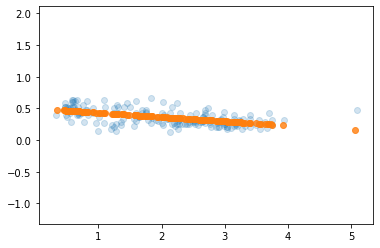

In [3]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

def main():
    # wine data를 불러옵니다.
    wine = load_wine()
    
    # 특정 column index를 지정한 뒤 연속되는 2개의 feature를 X에 저장합니다.
    column_start = 6
    X = wine.data[:, column_start : column_start + 2]
    
    # 1. PCA의 n_components를 1로 지정한 뒤,
    pca = PCA(n_components = 1)
    
    # 2. 모델을 학습하고
    pca.fit(X)
    
    # 3. X data를 넣어 X_pca 값을 추출합니다.
    X_pca = pca.transform(X)
    
    print("- original shape:   ", X.shape)
    print("- transformed shape:", X_pca.shape)
    
    # 축소된 주성분 축을 그려주는 부분입니다.
    X_new = pca.inverse_transform(X_pca)
    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal');
    

if __name__ == '__main__':
    main()

### 1-4. PCA를 활용한 얼굴 분류 (Eigen Face)

### 임의의 데이터 생성

Data의 차원이 높은 대표적인 예로, 이미지 데이터가 있습니다. 이미지 데이터를 가공하기 위해서 이미지가 가지고 있는 feature를 핸들링 하기 위해서는 많은 비용이 따르게 됩니다. 하지만 필요한 feature만을 추출하여 데이터를 사용할 수 있게 되면 더 빠르고 간편하게 결과를 도출할 수 있습니다.

이번 시간에는 “Eigen Face”라는 얼굴 이미지 데이터에 대하여, 주성분 분석을 이용하여 얼굴을 분류하는 실습을 진행하여 봅시다.

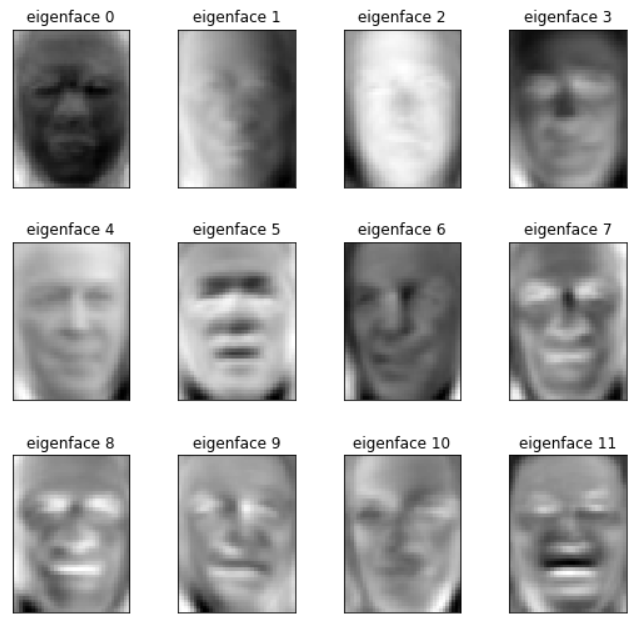

### 실습

코드의 흐름을 따라가면서 실습을 진행해 봅시다.

**(결과물 출력까지 약 3분 소요)**

코드는 다음과 같은 절차로 실행됩니다.

1. 데이터를 다운로드 하여 변수 X 및 변수 y에 저장합니다.

- n_samples : 전체 데이터 개수
- n_features : data X의 컬럼 수
- n_classes : data y의 클래스 수

2. training data와 test data를 나눕니다.

3. n_components 를 지정하여 PCA를 실행시키고 차원을 축소시킵니다.

4. 축소된 차원의 데이터를 가지고 SVM으로 Classification을 진행합니다.

5. SVM 모델을 트레이닝 후 평가합니다.

6. 결과를 시각화합니다.

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
Projecting the input data on the eigenfaces orthonormal basis
Fitting the classifier to the training set


C:\python\envs\cpu_env\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.61      0.76        18
     Colin Powell       0.78      0.88      0.83        60
  Donald Rumsfeld       0.93      0.81      0.87        32
    George W Bush       0.85      0.98      0.91       124
Gerhard Schroeder       0.92      0.70      0.79        33
      Hugo Chavez       1.00      0.73      0.84        11
       Tony Blair       0.85      0.77      0.81        44

         accuracy                           0.86       322
        macro avg       0.90      0.78      0.83       322
     weighted avg       0.87      0.86      0.85       322

[[ 11   2   

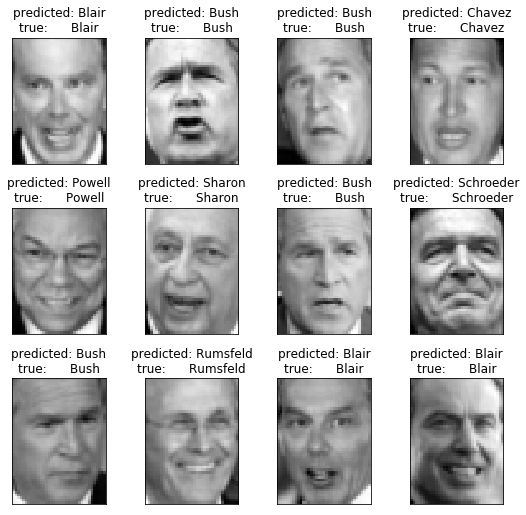

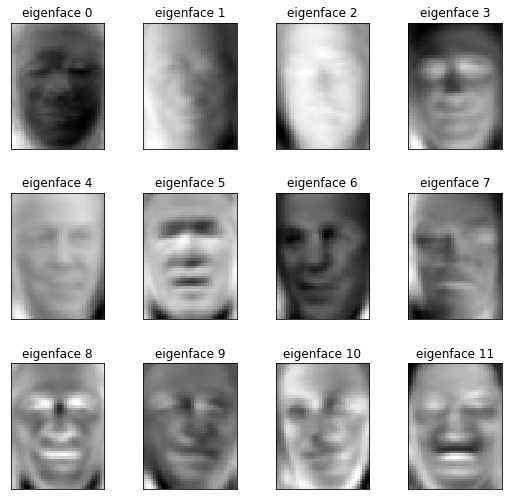

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

def main():
    # 데이터를 다운로드 합니다.
    lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

    # 데이터 내에 sample 수, 이미지 높이, 이미지 가로 길이 를 불러옵니다.
    n_samples, h, w = lfw_people.images.shape

    # 사람이미지 data를 X에 저장합니다.
    X = lfw_people.data

    # data X 내에 column (= feature) 개수를 확인합니다.
    n_features = X.shape[1]

    # y data를 데이터 셋의 .target 을 넣어서 호출합니다.
    y = lfw_people.target
    target_names = lfw_people.target_names

    # data y 내에 column (= feature) 개수를 확인합니다.
    n_classes = target_names.shape[0]

    print("Total dataset size:")
    print("n_samples: %d" % n_samples)
    print("n_features: %d" % n_features)
    print("n_classes: %d" % n_classes)    

    # data X, data y를 training, test data 로 나눕니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
    
    # n_components 에 축소할 차원 수를 정합니다.
    ## 앞서 검출한 n_features 를 토대로 축소할 값을 지정합니다.
    n_components = 150

    print("=================================\nExtracting the top %d eigenfaces from %d faces"
          % (n_components, X_train.shape[0]))

    pca = PCA(n_components=n_components, svd_solver='randomized',
              whiten=True).fit(X_train)

    eigenfaces = pca.components_.reshape((n_components, h, w))

    print("=================================\nProjecting the input data on the eigenfaces orthonormal basis")

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # SVM Classification을 합니다.
    print("=================================\nFitting the classifier to the training set")

    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                       param_grid, cv=5, iid=False)
    clf = clf.fit(X_train_pca, y_train)

    print("=================================\nBest estimator found by grid search:")
    print(clf.best_estimator_)

    # 모델을 평가합니다.
    print("=================================\nPredicting people's names on the test set")
    y_pred = clf.predict(X_test_pca)

    print(classification_report(y_test, y_pred, target_names=target_names))
    print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))    
    
    # 예측된 값을 시각화 합니다.
    prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]
    plot_gallery(X_test, prediction_titles, h, w)
    
    # eigenface 를 시각화 합니다.
    eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
    plot_gallery(eigenfaces, eigenface_titles, h, w)

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

if __name__ == '__main__':
    main()